# Importing packages from the environment into the Notebook

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv('real_estate_db.csv', encoding='latin-1') # imports the csv into the local notebook
df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID   state state_ab         city  \
0  220336      NaN       140        16        2  Alaska       AK     Unalaska   
1  220342      NaN       140        20        2  Alaska       AK  Eagle River   
2  220343      NaN       140        20        2  Alaska       AK         Jber   
3  220345      NaN       140        20        2  Alaska       AK    Anchorage   
4  220347      NaN       140        20        2  Alaska       AK    Anchorage   

             place  type  ... female_age_mean  female_age_median  \
0    Unalaska City  City  ...        32.78177           31.91667   
1        Anchorage  City  ...        38.97956           39.66667   
2        Anchorage  City  ...        22.20427           23.16667   
3  Point Mackenzie  City  ...        37.00750           34.00000   
4        Anchorage  City  ...        34.96611           31.75000   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          19.31875                 440.46429              1894.0  0.25053   
1          20.05513                 466.65478              1947.0  0.94989   
2          13.86575                 887.67805              3570.0  0.00759   
3          22.06347                 281.49420              1049.0  0.20247   
4          20.49887                 655.98066              2905.0  0.56936   

   married  married_snp  separated  divorced  
0  0.47388      0.30134    0.03443   0.09802  
1  0.52381      0.01777    0.00782   0.13575  
2  0.50459      0.06676    0.01000   0.01838  
3  0.44428      0.05933    0.00000   0.21563  
4  0.51034      0.08315    0.06731   0.08711  

[5 rows x 80 columns]

# Cleaning the data

In [5]:
df.drop_duplicates(subset=None, inplace=True) # drops duplicate rows
df.drop('BLOCKID', axis=1, inplace=True) # drops the nan-filled column

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True) # turns null characters into nan
df.dropna(axis=0, inplace=True) # drops nan-filled columns

In [7]:
df_sampled = df.sample(frac=0.01) # samples 0.1 of the db.

In [8]:
df_sampled.head() # prints the first five indexes of the new sampled db.

UID  SUMLEVEL  COUNTYID  STATEID           state state_ab  \
18257  255215       140       161       26        Michigan       MI   
20794  260015       140        57       37  North Carolina       NC   
15442  249872       140         3       25   Massachusetts       MA   
27317  272666       140        95       39            Ohio       OH   
35578  288460       140        35       49            Utah       UT   

                 city            place     type primary  ...  female_age_mean  \
18257       Ann Arbor   Ann Arbor City      CDP   tract  ...         36.31431   
20794       Lexington   Lexington City  Village   tract  ...         41.09126   
15442        Hinsdale  Pittsfield City     City   tract  ...         43.72123   
27317          Toledo      Toledo City  Village   tract  ...         37.11349   
35578  Salt Lake City            Magna     City   tract  ...         30.06587   

       female_age_median  female_age_stdev  female_age_sample_weight  \
18257           35.16667          22.15027                 735.80525   
20794           40.83333          23.92356                 823.45034   
15442           45.58333          21.93171                 226.92911   
27317           39.16667          22.17818                 539.25350   
35578           30.08333          20.55064                1274.10607   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
18257              3212.0  0.64093  0.66601      0.05428    0.00000   0.08606  
20794              3394.0  0.53542  0.46532      0.05518    0.01902   0.13870  
15442               992.0  0.88533  0.53010      0.01267    0.01267   0.12988  
27317              2521.0  0.52659  0.45492      0.05796    0.02810   0.09895  
35578              5532.0  0.80984  0.65939      0.14085    0.04516   0.06100  

[5 rows x 79 columns]

# Function to turn hs_degree into a binary

In [9]:
# finds and prints the mean rate of hs_degree
hs_degree_mean = df_sampled[['hs_degree']].mean()
print(hs_degree_mean)

hs_degree    0.855826
dtype: float64


In [10]:
# write function to check whether or not the average person is graduated
def check_condition(value, threshold):
    if value > threshold:
        return 'Yes'
    else:
        return 'No'

# uses function to check whether values are greater or lesser and writes to new column
df_sampled['avg_person_graduated'] = df_sampled['hs_degree'].apply(lambda x: check_condition(x, 0.855826))

# verifies the counts of yesses and nos within the newly generated column
yes_count = df_sampled[df_sampled['avg_person_graduated'] == 'Yes'].shape[0]
no_count = df_sampled[df_sampled['avg_person_graduated'] == 'No'].shape[0]

# verifies whether function worked
print(f"\nNumber of 'Yes' in avg_person_graduated: {yes_count}")
print(f"Number of 'No' in avg_person_graduated: {no_count}")
df_sampled.head()


Number of 'Yes' in avg_person_graduated: 234
Number of 'No' in avg_person_graduated: 145


UID  SUMLEVEL  COUNTYID  STATEID           state state_ab  \
18257  255215       140       161       26        Michigan       MI   
20794  260015       140        57       37  North Carolina       NC   
15442  249872       140         3       25   Massachusetts       MA   
27317  272666       140        95       39            Ohio       OH   
35578  288460       140        35       49            Utah       UT   

                 city            place     type primary  ...  \
18257       Ann Arbor   Ann Arbor City      CDP   tract  ...   
20794       Lexington   Lexington City  Village   tract  ...   
15442        Hinsdale  Pittsfield City     City   tract  ...   
27317          Toledo      Toledo City  Village   tract  ...   
35578  Salt Lake City            Magna     City   tract  ...   

       female_age_median  female_age_stdev  female_age_sample_weight  \
18257           35.16667          22.15027                 735.80525   
20794           40.83333          23.92356                 823.45034   
15442           45.58333          21.93171                 226.92911   
27317           39.16667          22.17818                 539.25350   
35578           30.08333          20.55064                1274.10607   

       female_age_samples  pct_own  married  married_snp  separated  divorced  \
18257              3212.0  0.64093  0.66601      0.05428    0.00000   0.08606   
20794              3394.0  0.53542  0.46532      0.05518    0.01902   0.13870   
15442               992.0  0.88533  0.53010      0.01267    0.01267   0.12988   
27317              2521.0  0.52659  0.45492      0.05796    0.02810   0.09895   
35578              5532.0  0.80984  0.65939      0.14085    0.04516   0.06100   

       avg_person_graduated  
18257                   Yes  
20794                    No  
15442                   Yes  
27317                   Yes  
35578                    No  

[5 rows x 80 columns]

# Neural Network

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# defines x and y values for training
data_no_hs_degree = df_sampled[['debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'family_mean']]
X = data_no_hs_degree
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [13]:
# splits data into x and y trains and preds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
print(X_train) # prints X_train

          debt   rent_mean  hc_mortgage_mean  home_equity_second_mortgage  \
37200  0.66530  1609.79870        2464.48151                      0.01945   
31608  0.43603   435.35302        1141.94618                      0.00000   
35248  0.39068   685.43623        1171.04424                      0.00000   
21570  0.71838  1380.90829        1517.81598                      0.00636   
16351  0.86526  2115.61141        2620.22699                      0.06327   
...        ...         ...               ...                          ...   
23090  0.61548  1085.67230        1805.59115                      0.00491   
27992  0.61253   823.00129        1156.75401                      0.03708   
8098   0.55352   842.91630        1459.03581                      0.00563   
38057  0.76538   891.19817        1344.60895                      0.02146   
37589  0.38266   738.52101        1276.20272                      0.01512   

       second_mortgage  home_equity   family_mean  
37200          0.01945 

In [15]:
print(y_train) # prints y_train

37200    1
31608    0
35248    0
21570    1
16351    1
        ..
23090    0
27992    0
8098     1
38057    1
37589    0
Name: avg_person_graduated, Length: 303, dtype: int64


In [16]:
np.isnan(X_train).any() # checks X_train for any nan values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
family_mean                    False
dtype: bool

In [17]:
X_train.isnull().any() # checks X_train for any null values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
family_mean                    False
dtype: bool

In [18]:
np.isnan(y_train).any() # checks y_train for any nan values

False

In [19]:
y_train.isnull().any() # checks y_train for any null values

False

In [20]:
# loads important models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import accuracy_score

# defines model, including two layers
model = Sequential()
model.add(Dense(units=32, activation='ReLU', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='ReLU'))
model.add(Dense(units=1, activation='sigmoid'))

#imports optimizer and learning rate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# optimizer
initial_learning_rate = 0.001  # learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# learning rate scheduler
def lr_scheduler(epoch):
    return initial_learning_rate * 0.95 ** epoch

# callbacks learning rate per epoch
lr_callback = LearningRateScheduler(lr_scheduler)

In [21]:
# defines model compiler
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fits model
model.fit(X_train, y_train, batch_size = 1, epochs = 100, callbacks=[lr_callback])

Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 292.8419 - accuracy: 0.5743 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 203.4648 - accuracy: 0.5776 - lr: 9.5000e-04
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 161.6261 - accuracy: 0.6271 - lr: 9.0250e-04
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 168.0121 - accuracy: 0.5974 - lr: 8.5737e-04
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 173.4114 - accuracy: 0.5974 - lr: 8.1451e-04
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 96.4717 - accuracy: 0.6139 - lr: 7.7378e-04
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 145.3347 - accuracy: 0.5974 - lr: 7.3509e-04
Epoch 8/100
303/303 [==============================] - 0s 981us/step - loss: 93.9268 - accuracy: 0.6403 - lr: 6.9834e-04
Epoch 9/100
303/303 [=======================

In [23]:
# performs a prediction
y_hat = model.predict(X_test)

# prints out the whole accuracy
print(y_hat)

# reevaluates to binary
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# prints out the accuracy again
print(y_hat)

# prints final accuracy
print(accuracy_score(y_test, y_hat))

3/3 [==============================] - 0s 2ms/step
[[1.0000000e+00]
 [9.9999952e-01]
 [9.8334885e-01]
 [2.5274564e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9933070e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.3426805e-08]
 [1.0000000e+00]
 [9.9998915e-01]
 [2.1312486e-19]
 [4.5359472e-14]
 [1.0000000e+00]
 [1.6826209e-20]
 [1.0000000e+00]
 [9.9989676e-01]
 [1.0000000e+00]
 [7.6649469e-01]
 [9.9999994e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999470e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.0184057e-07]
 [1.1058751e-01]
 [1.0000000e+00]
 [9.9999923e-01]
 [9.9999958e-01]
 [1.3352318e-06]
 [9.9999988e-01]
 [2.1436210e-16]
 [1.0000000e+00]
 [7.0621009e-11]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999970e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.9347719e-11]
 [3.6471714e-32]
 [9.1790333e-02]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999917e-01]
 [1.0000000e+0

In [24]:
accuracy_score(y_test, y_hat)

0.7105263157894737

# Heatmap

                  hs_degree  rent_mean  hc_mortgage_mean  second_mortgage  \
hs_degree          1.000000   0.331435          0.267818        -0.004709   
rent_mean          0.331435   1.000000          0.794669         0.228034   
hc_mortgage_mean   0.267818   0.794669          1.000000         0.219203   
second_mortgage   -0.004709   0.228034          0.219203         1.000000   
home_equity        0.369548   0.445051          0.454789         0.521274   
family_mean        0.616044   0.709555          0.745887         0.084857   

                  home_equity  family_mean  
hs_degree            0.369548     0.616044  
rent_mean            0.445051     0.709555  
hc_mortgage_mean     0.454789     0.745887  
second_mortgage      0.521274     0.084857  
home_equity          1.000000     0.490067  
family_mean          0.490067     1.000000  


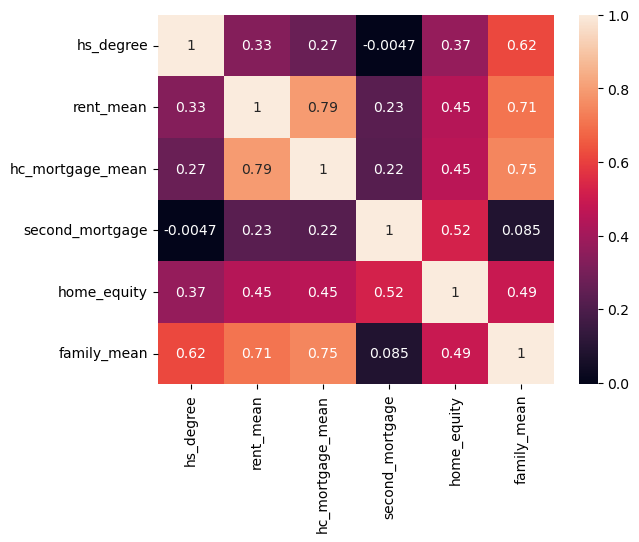

In [25]:
import matplotlib.pyplot as mp 
import seaborn as sb 
from PIL import _imaging
from PIL import Image
  
data = df_sampled[['hs_degree', 'rent_mean', 'hc_mortgage_mean', 'second_mortgage', 'home_equity', 'family_mean']]
 
print(data.corr()) 
  
dataplot=sb.heatmap(data.corr(), annot=True)
  
mp.show() 

# Interactive US Map

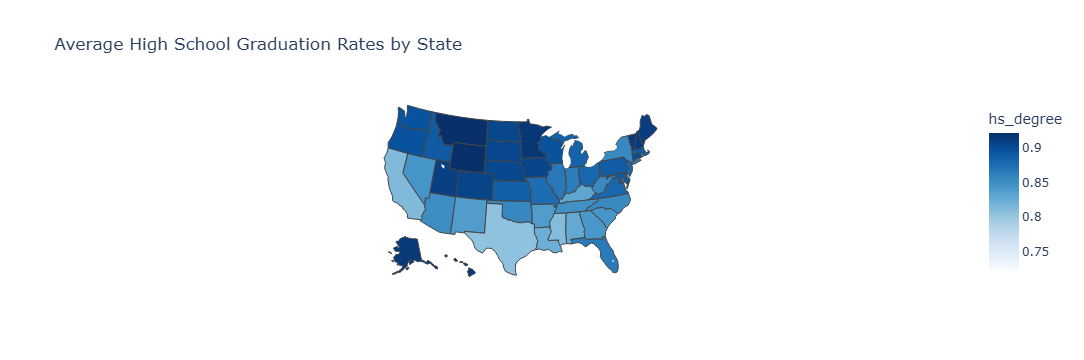

In [26]:
import plotly.express as px
avg_grad_rates = df.groupby('state_ab')['hs_degree'].mean().reset_index()

fig = px.choropleth(avg_grad_rates,
                    locations='state_ab',
                    locationmode='USA-states',
                    color='hs_degree',
                    hover_name='state_ab',
                    color_continuous_scale='blues',
                    title='Average High School Graduation Rates by State')
fig.update_layout(geo_scope='usa')
fig.show()

# Scatterplot of Degree Percentage versus Debt Percentage

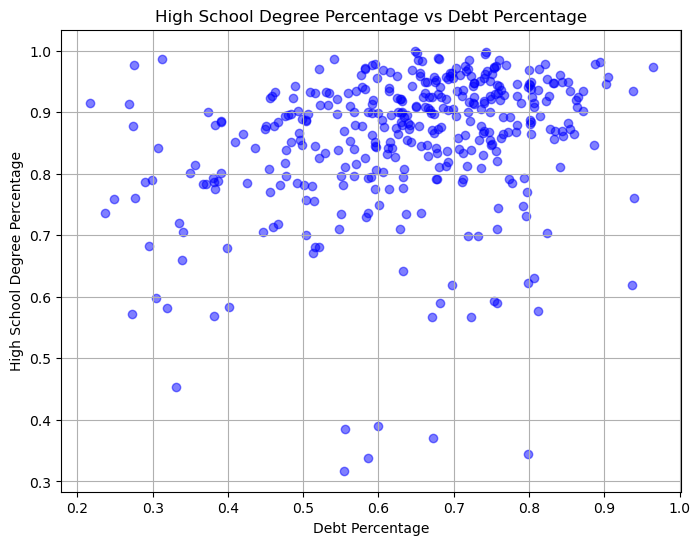

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_sampled['debt'], df_sampled['hs_degree'], color='b', alpha=0.5)
plt.title('High School Degree Percentage vs Debt Percentage')
plt.xlabel('Debt Percentage')
plt.ylabel('High School Degree Percentage')
plt.grid(True)
plt.show()

# Line Chart of Graduation Rate versus Debt Rate

C:\Users\jayja\AppData\Local\Temp\ipykernel_15572\1855344412.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



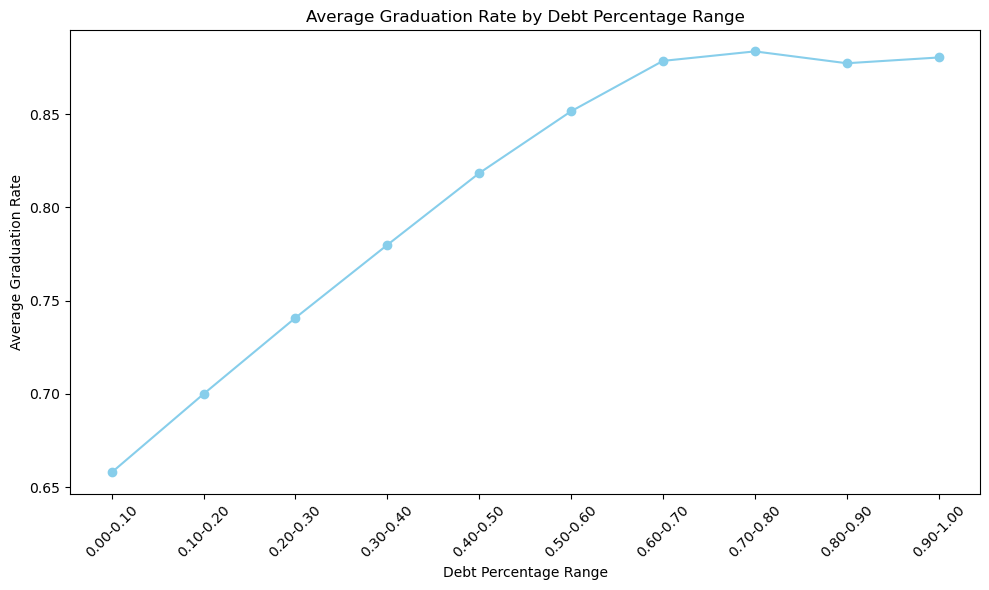

In [28]:
bins = np.linspace(0, 1, 11)  # Bins from 0 to 1 with 5 intervals
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]

df['debt_binned'] = pd.cut(df['debt'], bins=bins, labels=labels, right=False)

avg_graduation_rate = df.groupby('debt_binned')['hs_degree'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_graduation_rate.index, avg_graduation_rate.values, marker='o', linestyle='-', color='skyblue')

plt.xlabel('Debt Percentage Range')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by Debt Percentage Range')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [30]:
# identify the x and y
X = df_sampled[['debt', 'family_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [31]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# creates the random forest classifier
clf = RandomForestClassifier(random_state=42)

In [33]:
# trains the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# predicts values based on previously split test set
y_pred = clf.predict(X_test)

In [35]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.72
Confusion Matrix:
[[17  9]
 [12 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        26
           1       0.81      0.76      0.78        50

    accuracy                           0.72        76
   macro avg       0.70      0.71      0.70        76
weighted avg       0.73      0.72      0.73        76



C:\Users\jayja\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



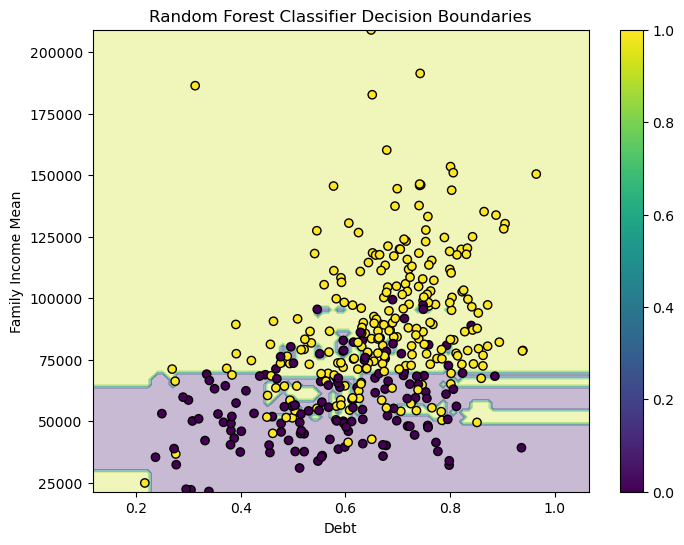

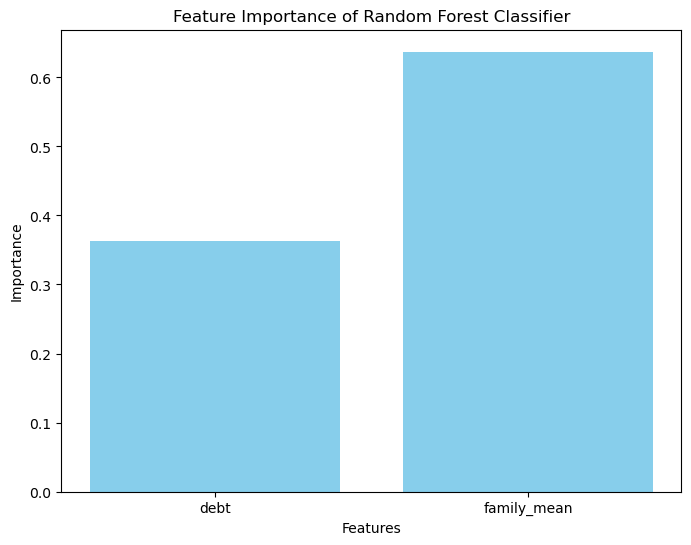

In [36]:
# plots boundaries
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    xx, yy = np.meshgrid(np.linspace(X.values[:, 0].min() - 0.1, X.values[:, 0].max() + 0.1, 100),
                         np.linspace(X.values[:, 1].min() - 100, X.values[:, 1].max() + 100, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.xlabel('Debt')
    plt.ylabel('Family Income Mean')
    plt.title('Random Forest Classifier Decision Boundaries')
    plt.colorbar()
    plt.show()

# plots features
plt.figure(figsize=(8, 6))
plt.bar(X.columns, clf.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

# Decision Tree Classifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [38]:
# find x and y
X = df_sampled[['debt', 'family_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
# separates data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# creates a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [41]:
# trains the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# predicts x_test
y_pred = clf.predict(X_test)

In [43]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.64
Confusion Matrix:
[[15 11]
 [16 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.58      0.53        26
           1       0.76      0.68      0.72        50

    accuracy                           0.64        76
   macro avg       0.62      0.63      0.62        76
weighted avg       0.66      0.64      0.65        76



C:\Users\jayja\AppData\Local\Temp\ipykernel_15572\1919294479.py:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\jayja\AppData\Local\Temp\ipykernel_15572\1919294479.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\jayja\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



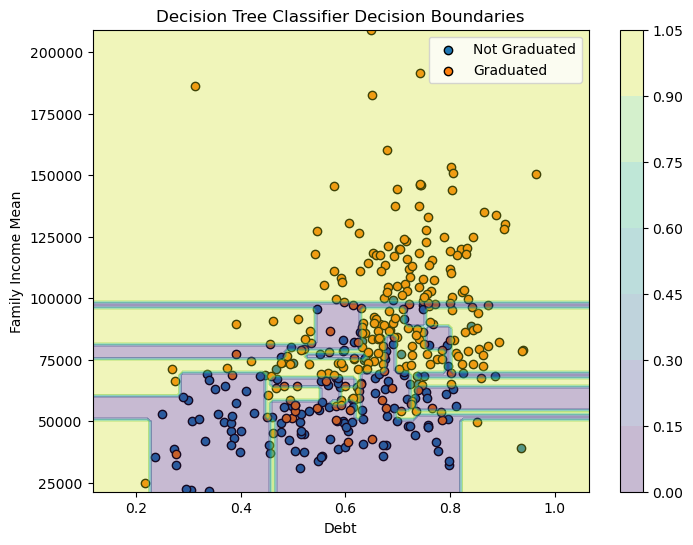

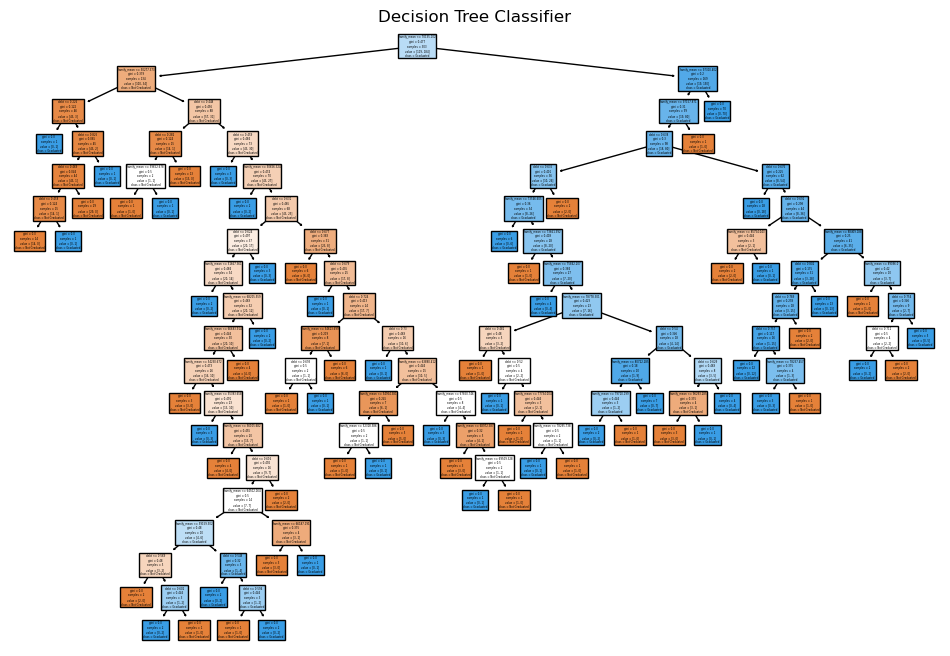

In [44]:
# plots the boundaries
plt.figure(figsize=(8, 6))

# plots points of each class
plt.scatter(X[y == 0]['debt'], X[y == 0]['family_mean'], cmap='viridis', edgecolors='k', label='Not Graduated')
plt.scatter(X[y == 1]['debt'], X[y == 1]['family_mean'], cmap='viridis', edgecolors='k', label='Graduated')

# creates a meshgrid to plot the decision boundaries
xx, yy = np.meshgrid(np.linspace(X['debt'].min() - 0.1, X['debt'].max() + 0.1, 100),
                     np.linspace(X['family_mean'].min() - 100, X['family_mean'].max() + 100, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plots the contour filled regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# labels and title
plt.xlabel('Debt')
plt.ylabel('Family Income Mean')
plt.title('Decision Tree Classifier Decision Boundaries')
plt.colorbar()
plt.legend()
plt.show()
# plots the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Graduated', 'Graduated'])
plt.title('Decision Tree Classifier')
plt.show()

# Pair Plot of Rent Mean versus Highschool Degree Rate

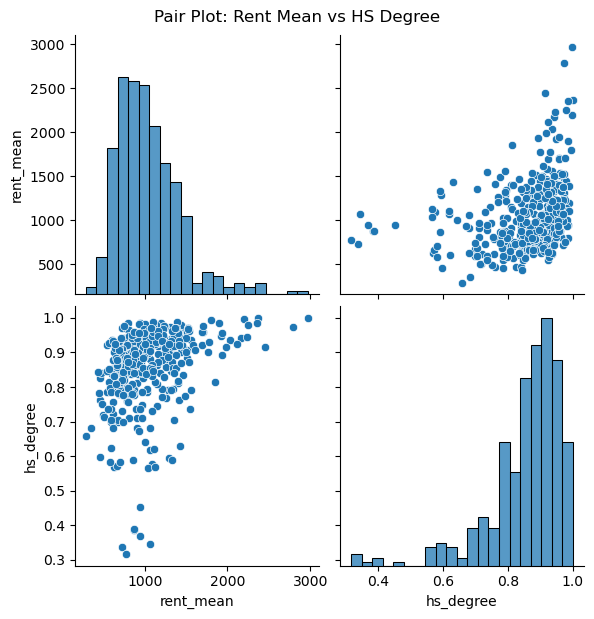

In [45]:
sb.pairplot(df_sampled[['rent_mean', 'hs_degree']], height=3)
plt.suptitle('Pair Plot: Rent Mean vs HS Degree', y=1.02)
plt.show()

# Joint Plot of Mortgage Mean versus High School Degree Rate

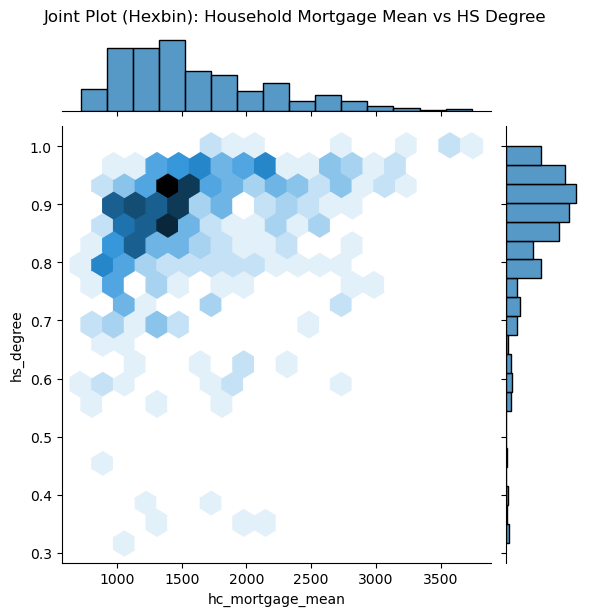

In [46]:
sb.jointplot(x='hc_mortgage_mean', y='hs_degree', data=df_sampled, kind='hex', height=6)
plt.suptitle('Joint Plot (Hexbin): Household Mortgage Mean vs HS Degree', y=1.02)
plt.show()

# Scatter Plot of Family Income Mean versus High School Degree Rate

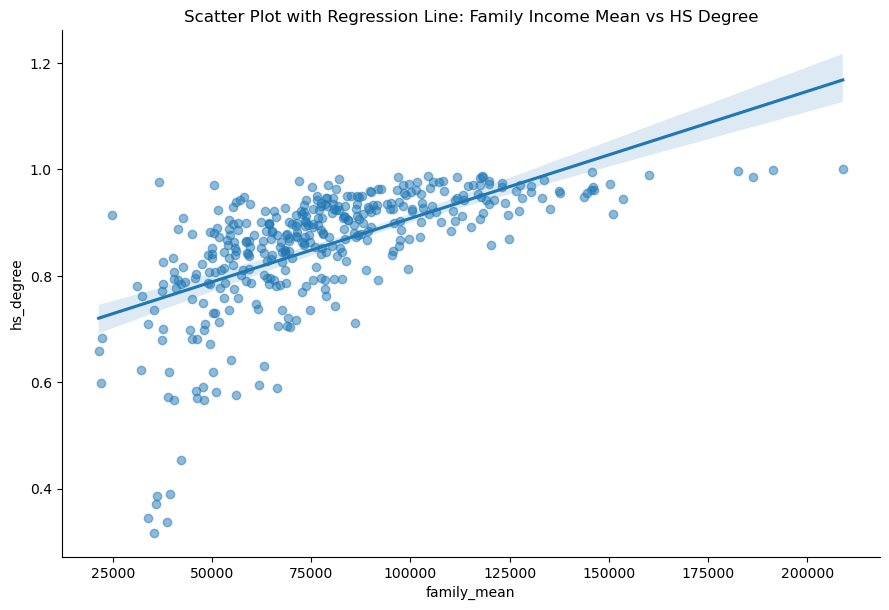

In [47]:
sb.lmplot(x='family_mean', y='hs_degree', data=df_sampled, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Family Income Mean vs HS Degree')
plt.show()